# Importing library

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Data Insertion (2022-2018)

In [44]:
df=pd.read_csv(r"G:\myproject\2022.csv")
df_21=pd.read_csv(r"G:\myproject\2021.csv")
df_20=pd.read_csv(r"G:\myproject\2020.csv")
df_19=pd.read_csv(r"G:\myproject\2019.csv")
df_18=pd.read_csv(r"G:\myproject\2018.csv")

## Checking the head and tail of the data

In [45]:
df.head()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
0,1,Finland,"7,821","7,886","7,756","2,518","1,892","1,258","0,775","0,736","0,109","0,534"
1,2,Denmark,"7,636","7,710","7,563","2,226","1,953","1,243","0,777","0,719","0,188","0,532"
2,3,Iceland,"7,557","7,651","7,464","2,320","1,936","1,320","0,803","0,718","0,270","0,191"
3,4,Switzerland,"7,512","7,586","7,437","2,153","2,026","1,226","0,822","0,677","0,147","0,461"
4,5,Netherlands,"7,415","7,471","7,359","2,137","1,945","1,206","0,787","0,651","0,271","0,419"


In [46]:
df.tail()

,RANK,Country,Happiness score,Whisker-high,Whisker-low,Dystopia (1.83) + residual,Explained by: GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption
142,143,Rwanda*,"3,268","3,462","3,074","0,536","0,785","0,133","0,462","0,621","0,187","0,544"
143,144,Zimbabwe,"2,995","3,110","2,880","0,548","0,947","0,690","0,270","0,329","0,106","0,105"
144,145,Lebanon,"2,955","3,049","2,862","0,216","1,392","0,498","0,631","0,103","0,082","0,034"
145,146,Afghanistan,"2,404","2,469","2,339","1,263","0,758","0,000","0,289","0,000","0,089","0,005"
146,147,xx,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [48]:
country=df['Country']

### Renaming columns

In [84]:
column = {
    'RANK': 'Happiness Rank',
    'Explained by: GDP per capita': 'Economy (GDP per Capita)',
    'Explained by: Social support': 'Family',
    'Explained by: Healthy life expectancy': 'Health (Life Expectancy)',
    'Explained by: Freedom to make life choices': 'Freedom',
    'Explained by: Generosity': 'Generosity',
    'Explained by: Perceptions of corruption': 'Trust (Government Corruption)'
}
df.rename(columns=column, inplace=True)

In [50]:
# Extracting useful columns
df=df[['Country',  'Happiness Rank', 'Happiness score',
       'Economy (GDP per Capita)', 'Family',
       'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)',
       'Generosity']]

## Data Types

In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 9 columns):
Country                          147 non-null object
Happiness Rank                   147 non-null int64
Happiness score                  146 non-null object
Economy (GDP per Capita)         146 non-null object
Family                           146 non-null object
Health (Life Expectancy)         146 non-null object
Freedom                          146 non-null object
Trust (Government Corruption)    146 non-null object
Generosity                       146 non-null object
dtypes: int64(1), object(8)
memory usage: 10.5+ KB


## Checking for Null values

In [52]:
df.isnull().sum()

Country                          0
Happiness Rank                   0
Happiness score                  1
Economy (GDP per Capita)         1
Family                           1
Health (Life Expectancy)         1
Freedom                          1
Trust (Government Corruption)    1
Generosity                       1
dtype: int64

### Dropping null values

In [53]:
df.dropna(inplace=True)

## Descriptive Statistics of numerical data

In [54]:
df.describe()

,Happiness Rank
count,146.000000
mean,73.500000
std,42.290661
min,1.000000
25%,37.250000
50%,73.500000
75%,109.750000
max,146.000000


In [55]:
df['Economy (GDP per Capita)'].describe()

count       146
unique      141
top       1,815
freq          3
Name: Economy (GDP per Capita), dtype: object

### Data preprocessing

In [56]:
# List of columns to be processed
columns= ['Happiness Rank', 'Happiness score', 'Economy (GDP per Capita)',
                       'Family', 'Health (Life Expectancy)', 'Freedom',
                       'Trust (Government Corruption)', 'Generosity']

# Replace commas with dots and convert to float
df1 = df[columns].replace({',': '.'}, regex=True).astype(float)

In [60]:
df=pd.concat((country,df1),axis=1)

## Duplicated data

In [61]:
len(df[df.duplicated()])

0

## Getting the Numerical and Categorical data variable name

In [62]:
numerical_variables = [i for i in df.columns if df[i].dtype !='O']
categorical_variables = [i for i in df.columns if df[i].dtype =='O']
print(f'Numerical variables are {numerical_variables}\n\n')
print(f'Categorical vraiables are {categorical_variables}')

Numerical variables are ['Happiness Rank', 'Happiness score', 'Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 'Freedom', 'Trust (Government Corruption)', 'Generosity']


Categorical vraiables are ['Country']


## Analyze

# Data Distribution

### Distribution of the data
## Histogram

In [88]:
def histogram(df, i):
    plt.figure(figsize=(7, 5))
    plt.hist(df[i], bins=20, color='blue', edgecolor='black')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(f'Histogram for {i}')
    plt.show()

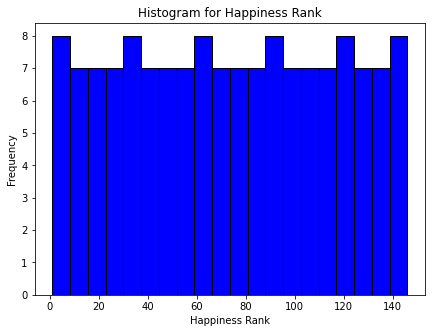

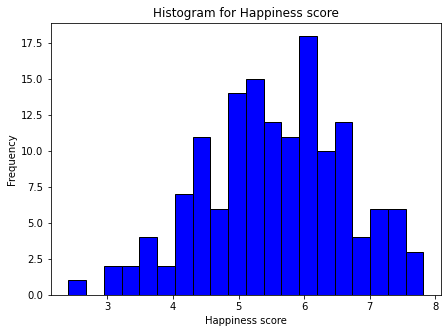

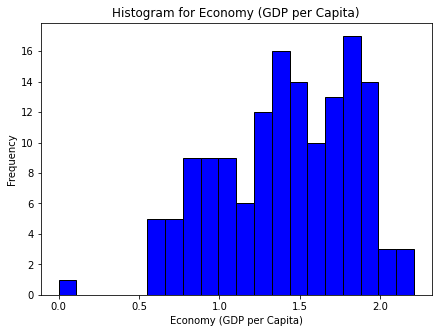

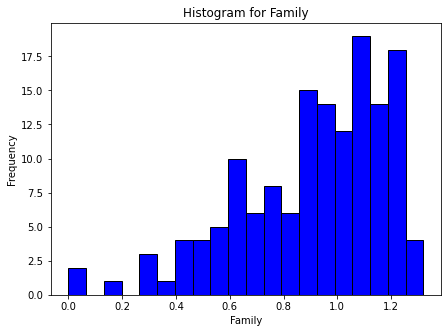

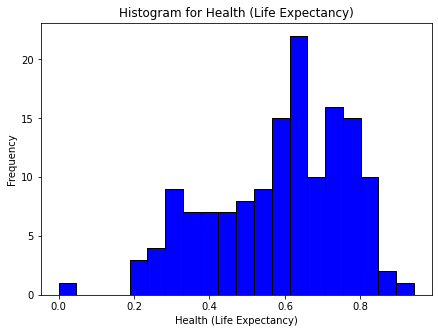

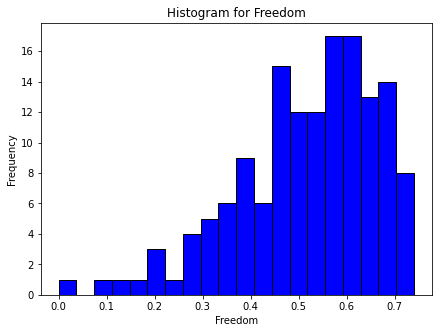

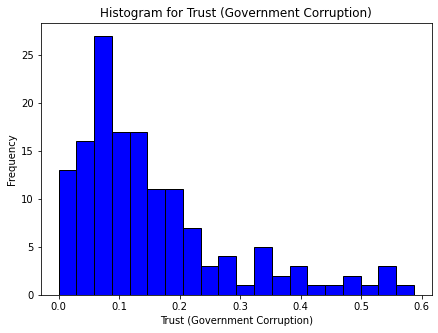

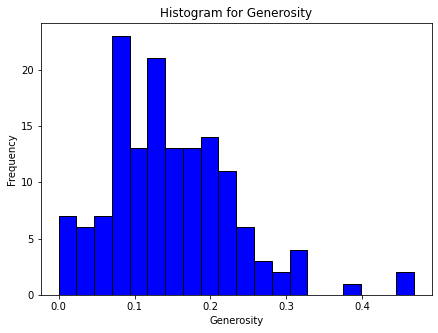

In [89]:
for i in numerical_variables:
    histogram(df[numerical_variables],i)

In [65]:
df['Freedom'].describe()

count    146.000000
mean       0.517226
std        0.145859
min        0.000000
25%        0.440500
50%        0.543500
75%        0.626000
max        0.740000
Name: Freedom, dtype: float64

### BAR CHART

### Top 5 Countries with the Highest Happiness Scores

In [90]:
colors = ['blue', 'red', 'yellow', 'green', 'purple']

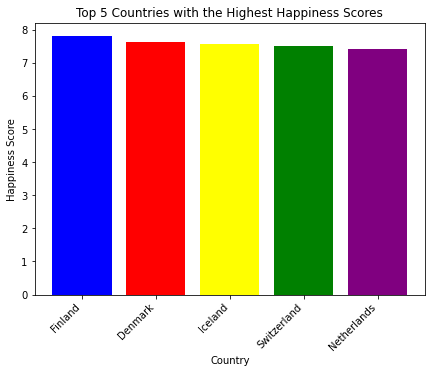

In [91]:
sorted_df = df.sort_values(by='Happiness score', ascending=False)
top_5_df = sorted_df.head(5)
plt.figure(figsize=(7, 5))
plt.bar(top_5_df['Country'], top_5_df['Happiness score'], color=colors)
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 5 Countries with the Highest Happiness Scores')
plt.xticks(rotation=45, ha='right')
plt.show()

### Top 5 lowest Happiness Scores by country

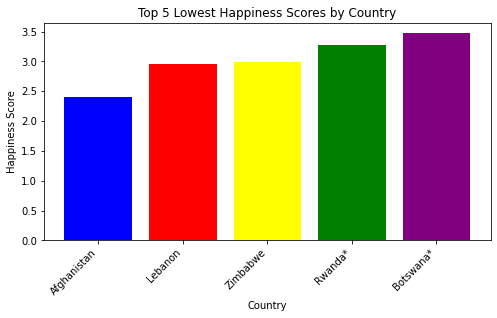

In [92]:
lowest_happiness_scores = df.sort_values(by='Happiness score').head(5)
plt.figure(figsize=(8, 4))
plt.bar(lowest_happiness_scores['Country'], lowest_happiness_scores['Happiness score'], color=colors)
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title('Top 5 Lowest Happiness Scores by Country')
plt.xticks(rotation=45, ha='right')
plt.show()

### Pie chart

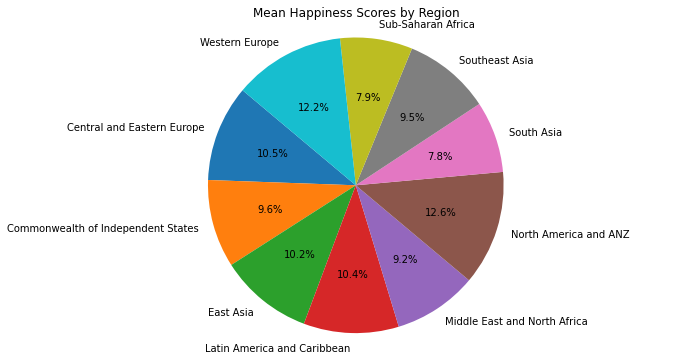

In [95]:
mean_scores_by_region = df_21.groupby('Regional indicator')['Ladder score'].mean()
plt.figure(figsize=(12, 6))
plt.pie(mean_scores_by_region, labels=mean_scores_by_region.index, autopct='%1.1f%%', startangle=140)
plt.title('Mean Happiness Scores by Region')
plt.axis('equal')
plt.show()

In [96]:
df_21.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [97]:
df_21.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


### Comparing India

In [98]:
max_happiness_country = df.loc[df['Happiness score'].idxmax()]['Country']
selected_data = df[df['Country'].isin(['India', max_happiness_country])]
happiness_score_india = df.loc[df['Country'] == 'India', 'Happiness score'].values[0]

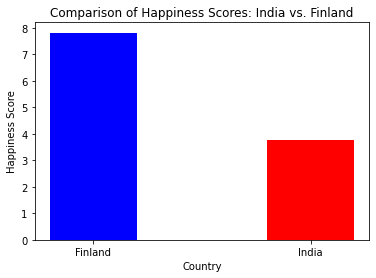

The highest hapiness score is of Finland with score0      7.821
135    3.777
Name: Happiness score, dtype: float64
The Happiness Score for India is: 3.777
The average Hapiness Score of World is 5.55357534246575


In [99]:
bar_width = 0.4
index = [0, 1]
plt.figure(figsize=(6, 4))
plt.bar(index, selected_data['Happiness score'], width=bar_width, color=['blue', 'red'])
plt.xlabel('Country')
plt.ylabel('Happiness Score')
plt.title(f'Comparison of Happiness Scores: India vs. {max_happiness_country}')
plt.xticks(index, [max_happiness_country,'India'])
plt.show()
print(f'The highest hapiness score is of {max_happiness_country} with score{selected_data["Happiness score"]}')
print(f"The Happiness Score for India is: {happiness_score_india}")
print(f'The average Hapiness Score of World is {df["Happiness score"].mean()}')

# Comparison of GDP per Capita: India vs. Country with Highest Happiness Score

In [74]:
highest_happiness_country = df[df['Happiness score'] == df['Happiness score'].max()]
gdp_per_capita_india = df[df['Country'] == 'India']['Economy (GDP per Capita)'].values[0]
gdp_per_capita_highest = highest_happiness_country['Economy (GDP per Capita)'].values[0]
countries = ['India', highest_happiness_country['Country'].values[0]]
gdp_values = [gdp_per_capita_india, gdp_per_capita_highest]

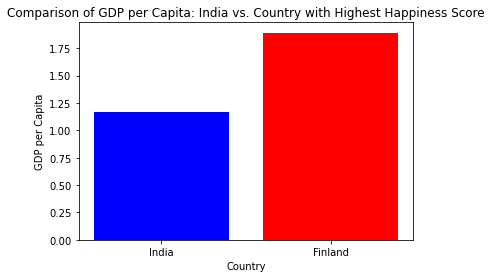

The per capita gdp of Finland is 1.892
The per capita gdp of India is 1.167


In [82]:
plt.figure(figsize=(6, 4))
plt.bar(countries, gdp_values, color=['blue', 'red'])
plt.xlabel('Country')
plt.ylabel('GDP per Capita')
plt.title('Comparison of GDP per Capita: India vs. Country with Highest Happiness Score')
plt.show()
print(f'The per capita gdp of Finland is {gdp_per_capita_highest}')
print(f'The per capita gdp of India is {gdp_per_capita_india}')

### Happiness Score of India Over 5 years 

### Line Chart

In [76]:
happiness_22 = list(df[df['Country'] == 'India']['Happiness score'].values)[0]
happiness_21 = list(df_21[df_21['Country name'] == 'India']['Ladder score'].values)[0]
happiness_20 = list(df_20[df_20['Country name'] == 'India']['Ladder score'].values)[0]
happiness_19 = list(df_19[df_19['Country or region'] == 'India']['Score'].values)[0]
happiness_18 = list(df_18[df_18['Country or region'] == 'India']['Score'].values)[0]
hapiness_year=[happiness_22,happiness_21,happiness_20,happiness_19,happiness_18]
years = ['2018', '2019', '2020', '2021', '2022']

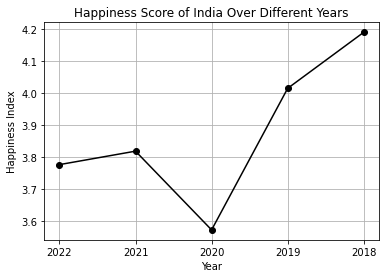

In [94]:
plt.plot(years, hapiness_year, marker='o', linestyle='-', color='black')
plt.xlabel('Year')
plt.ylabel('Happiness Index')
plt.title('Happiness Score of India Over Different Years')
plt.grid(True)
plt.show()

### World average hapiness score

### Comparing the data from 2022-2018

In [78]:
t_22=df['Happiness score'].mean()
t_21=df_21['Ladder score'].mean()
t_20=df_20['Ladder score'].mean()
t_19=df_19['Score'].mean()
t_18=df_18['Score'].mean()
years = ['2022', '2021', '2020', '2019', '2018']
mean_scores = [t_22, t_21, t_20, t_19, t_18]

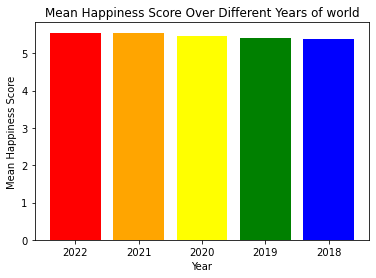

In [79]:
plt.bar(years, mean_scores, color=colors)
plt.xlabel('Year')
plt.ylabel('Mean Happiness Score')
plt.title('Mean Happiness Score Over Different Years of world')
plt.show()

In [80]:
df_21.columns

Index(['Country name', 'Regional indicator', 'Ladder score',
       'Standard error of ladder score', 'upperwhisker', 'lowerwhisker',
       'Logged GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual'],
      dtype='object')

In [81]:
df_21.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
